In [1]:
# read in binary data
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys, os
sys.path.append(os.environ['raco'])
from common import dotdict, g_univ
f = open("Model_S.pkl", "rb")
di = dotdict(pickle.load(f))
f.close()

In [2]:
di.msun

1.989e+33

In [3]:
# all right let's plot some diffusion coefficients

(0.0, 6.0)

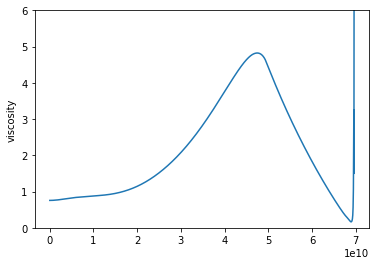

In [4]:
plt.plot(di.rr, di.nu)
plt.ylabel('viscosity')
plt.ylim(0,6)

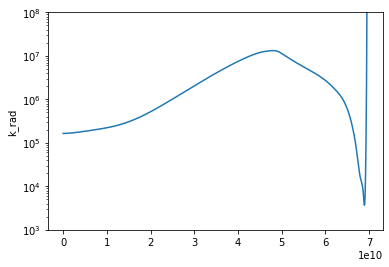

In [5]:
plt.plot(di.rr, di.kappa)
plt.ylim(1e3, 1e8)
plt.ylabel('k_rad')
plt.yscale('log')

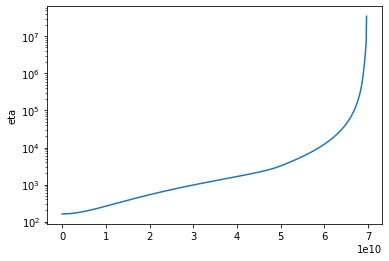

In [6]:
plt.plot(di.rr, di.eta)
plt.ylabel('eta')
plt.yscale('log')

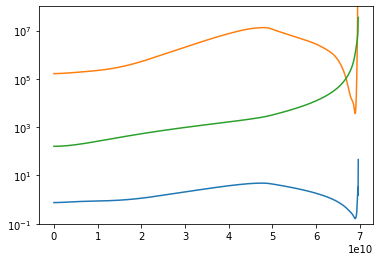

In [7]:
# see what they all look like on same scale
plt.plot(di.rr, di.nu)
plt.plot(di.rr, di.kappa)
plt.plot(di.rr, di.eta)
plt.ylim(0.1,1e8)
plt.yscale('log')

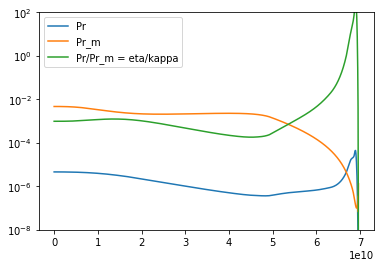

In [8]:
# plot Prandtl numbers
plt.plot(di.rr, di.pr, label='Pr')
plt.plot(di.rr, di.prm, label='Pr_m')
plt.plot(di.rr, di.pr/di.prm, label='Pr/Pr_m = eta/kappa')
plt.legend()
plt.ylim(1e-8, 100)
plt.yscale('log')

(1, 1000000.0)

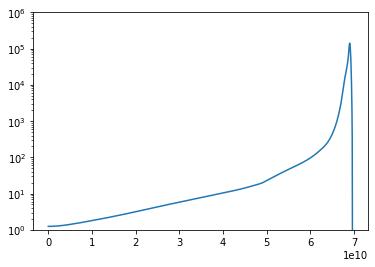

In [9]:
# plot opacity
plt.plot(di.rr, di.opa)
plt.yscale('log')
plt.ylim(1, 1e6)

(200000000.0, 400000000.0)

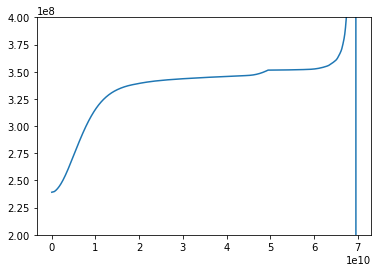

In [11]:
# plot opacity
plt.plot(di.rr, di.c_p)
plt.ylim(2e8,4e8)

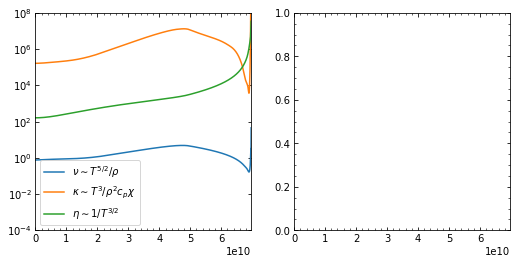

In [12]:
# let's make nice plot of diffusions and Prandtl numbers
fig, axs = plt.subplots(1, 2, figsize=(8.5, 4), sharex=True)
axs = axs.flatten()
ax1, ax2 = axs

ax1.plot(di.rr, di.nu, label=r'$\nu\sim T^{5/2}/\rho$')
ax1.plot(di.rr, di.kappa, label=r'$\kappa\sim T^3/\rho^2c_p\chi$')
ax1.plot(di.rr, di.eta, label=r'$\eta\sim 1/T^{3/2}$')
ax1.legend(loc='lower left')

y1, y2 = 1e-4, 1e8
npoints = 100
yvals = np.linspace(y1, y2, npoints)

ax1.set_xlim(0, di.rsun)
ax1.set_ylim(y1, y2)
ax1.set_yscale('log')

for ax in axs:
    plt.sca(ax)
    plt.minorticks_on()
    plt.tick_params(top=True, right=True, direction='in', which='both')
    
plt.savefig('plots/Model_S_diffusions.png', dpi=300)

In [ ]:
print(nu[ircz])
print(eta[ircz])
print(kappa[ircz])

In [ ]:
plt.plot(rr,di.dsdr)
plt.ylim(0, .02)

In [ ]:
brunt2 = di.g/di.cp*di.dsdr
plt.plot(rr, brunt2)
plt.ylim(0,1e-5)

In [ ]:
om = 2.7e-6
sig = (brunt2/4/om**2)*pr
plt.plot(rr,sig)
plt.yscale('log')
plt.ylim(1e-3, 10)

In [ ]:
plt.plot(rr, np.sqrt(sig))

In [ ]:
ir2 = np.argmin(np.abs(rr-4e10))
brunt2[ir2]/4/om**2